In [65]:
import scipy.signal as signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Import recorded raw data

In [66]:
keyword = 'fast'
# Load Row data into pandas

df = pd.read_csv("data/raw-rot-"+keyword+".csv", names =['time', 'rotX', 'rotY', 'rotZ','rotScalar', 'accuracy'])

# Make time starting from 0 and convert to ms
init_time = df.time.iloc[0]
df.time = (df.time - init_time)/1e6

## Data processing
Basically the same as Kotlin class 

In [67]:
# parameters:
n = 30       # the larger n is, the smoother curve will be
n_avg = 500 # elements used to calculate average
band_width = 0.01  # 



# Filter with moving average over n elements 
b = [1.0 / n] * n
a = 1
df['filtered'] = signal.lfilter(b,a,df['rotScalar'])

# Calculate average of last 2000 elements
b = [1.0 / n_avg] * n_avg
a = 1
df['running_avg'] = signal.lfilter(b,a,df['filtered'])

# Define limits
df['upperlimit'] = df['running_avg']*(1 + (band_width/2.0))
df['lowerlimit'] = df['running_avg']*(1 - (band_width/2.0))

# Detect when limits are crossed
rows_list = []
isBelow = False

for tuple in df.itertuples(): 
    if isBelow and tuple.filtered > tuple.upperlimit:
        isBelow = False
    
    if (not isBelow) and (tuple.filtered < tuple.lowerlimit) :
        isBelow = True
        rows_list.append({'time': tuple.time, 'value': tuple.filtered})

df2 = pd.DataFrame(rows_list)          

## Plot found beginnings of period

138360


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

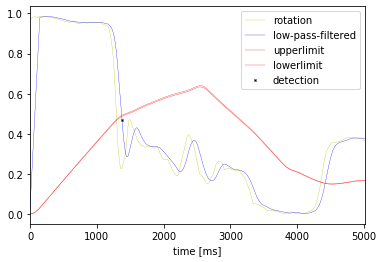

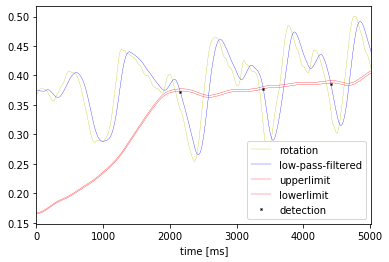

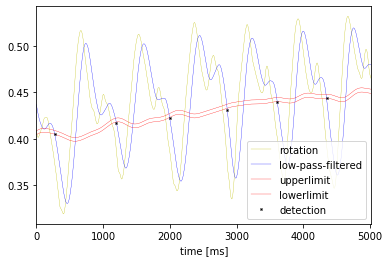

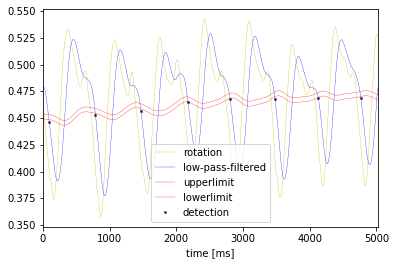

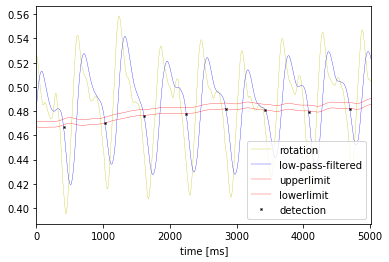

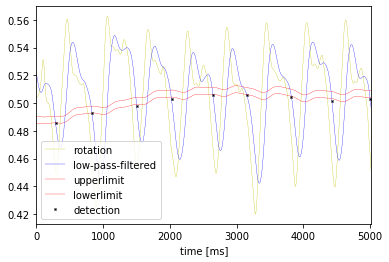

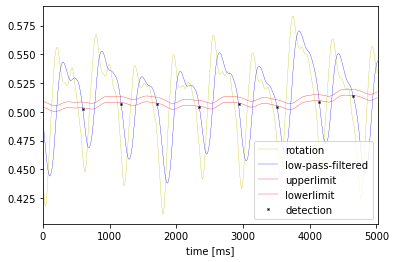

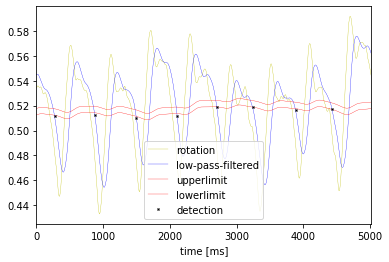

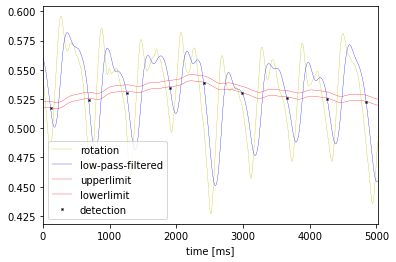

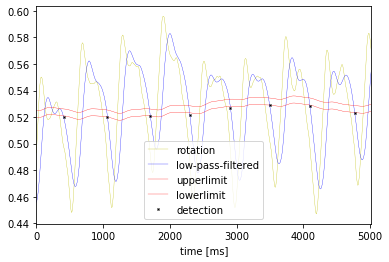

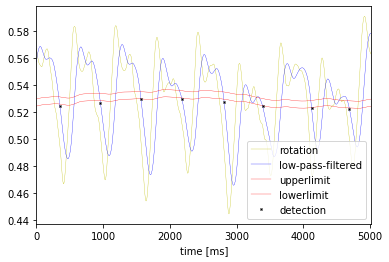

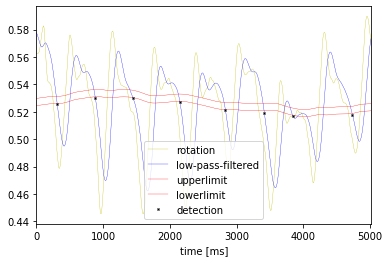

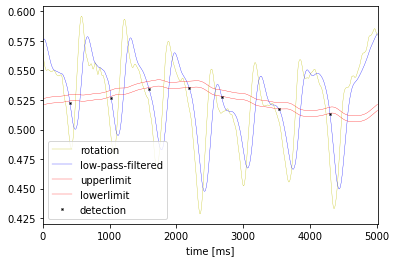

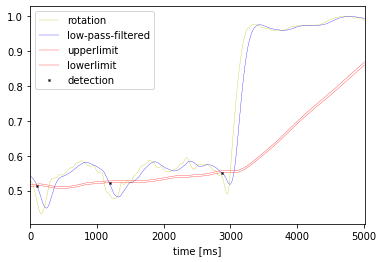

In [68]:
print(df.size)

n_windows = int(df.time.size/1000)+1

for i in range(n_windows):
    # Limit data to certain window
    df_part = df.head(1000*(1+i)).tail(1000)
    start = df_part.time.iloc[0]
    end = df_part.time.iloc[-1]
    
    df2['time2'] = df2.time - start
    df2['detection'] = df2['value'] 
    
    df2_part = df2[(start < df2['time']) & (df2['time'] < end)] 
    
    df_part['time2'] = df_part.time - start
    df_part['rotation'] = df_part['rotScalar']
    df_part['low-pass-filtered'] = df_part['filtered']
    
    
    ax = df_part.plot(x = 'time2', y=['rotation', 'low-pass-filtered', 'upperlimit', 'lowerlimit'], color ='ybrr', kind = 'line', linewidth=0.3)
    
    df2_part.plot(x='time2', y='detection', linestyle='None', marker='x', color='k', markersize=2, ax=ax)
    ax.set_xlabel('time [ms]')
    plt.savefig('out/part'+str(i)+'.eps', format='eps')
